<a href="https://colab.research.google.com/github/nikilstark/Python-assignments/blob/master/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 49.7MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.6MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 99.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 71.7MB/s]


In [0]:
import pandas as pd

In [0]:
df_train = pd.read_csv('train.csv.zip',compression='zip',header=0,sep=',')
df_test = pd.read_csv('test.csv.zip',compression='zip',header=0,sep=',')

In [9]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from mlxtend.plotting import plot_confusion_matrix

In [0]:
X_train = df_train.drop(labels=["label"],axis=1)
Y_train = df_train["label"]

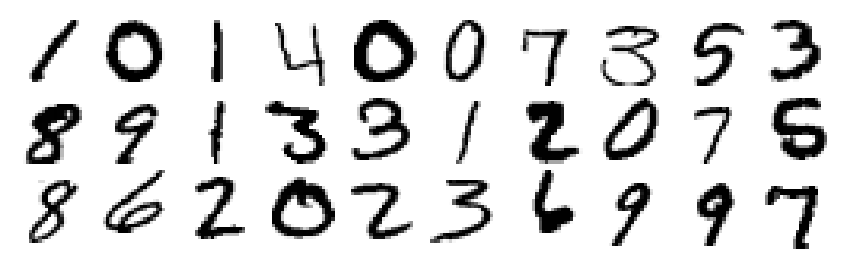

In [58]:
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [12]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

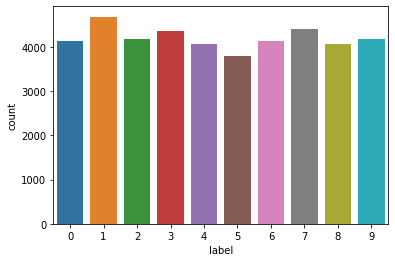

In [13]:
sns.countplot(Y_train)

In [14]:
df_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [15]:
df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#**Normalization**

In [0]:
X_train = X_train/255.0
df_test = df_test/255.0

#**Reshape**

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

# **Labelencoding**

In [0]:
Y_train = to_categorical(Y_train,num_classes=10)

#**Train Test Split**




In [0]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size = 0.1, random_state = 2)

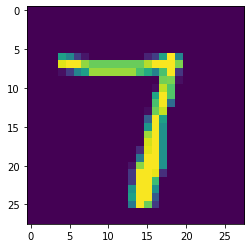

In [20]:
plt.imshow(x_train[1][:,:,0])

#**CNN**

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape =(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = RMSprop(lr = 0.001 , rho= 0.9,epsilon=1e-08,decay=0.0)

In [24]:
model.compile(optimizer=optimizer,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [0]:
epochs =1
batch_size = 86

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

#**Without Data Augmentation**

In [27]:
history1 = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val),verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37800 samples, validate on 4200 samples
Epoch 1/1





37800/37800 [==============================] - 281s 7ms/step - loss: 0.2486 - acc: 0.9214 - val_loss: 0.0698 - val_acc: 0.9790


In [0]:
y1_pred = model.predict_classes(x_val)

In [0]:
y1_pred_=model.predict_classes(x_val)

In [0]:
y1_pred_class = np.argmax(y1_pred_)

In [0]:
y1_true = np.argmax(y_val,axis=1)

In [0]:
conf1_matrix = confusion_matrix(y1_true,y1_pred)

([<matplotlib.axis.YTick at 0x7f98222f72e8>,
 <a list of 10 Text yticklabel objects>)

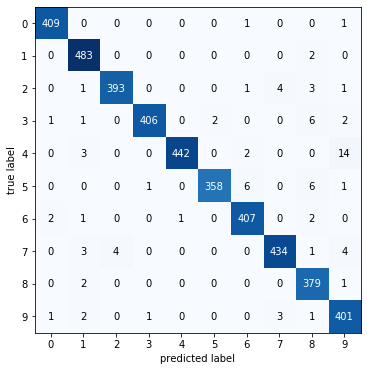

In [40]:
plot_confusion_matrix(conf1_matrix,figsize=(6,6),hide_ticks=True)
plt.xticks(range(10))
plt.yticks(range(10))

In [42]:
accuracy_score(y1_true,y1_pred)

0.979047619047619

#**Data Augmentation Method**

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,vertical_flip=False)
datagen.fit(x_train)

In [44]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_val,y_val),verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

Epoch 1/1
 - 276s - loss: 0.2041 - acc: 0.9386 - val_loss: 0.0507 - val_acc: 0.9867


In [0]:
y_pred = model.predict_classes(x_val)                                           

In [0]:
y_pred_ = model.predict(x_val)

In [0]:
y_pred_class = np.argmax(y_pred_ , axis=1)

In [0]:
y_true = np.argmax(y_val,axis=1)

In [0]:
conf_matrix_ =confusion_matrix(y_true,y_pred)

([<matplotlib.axis.YTick at 0x7f9824b7f5c0>,
 <a list of 10 Text yticklabel objects>)

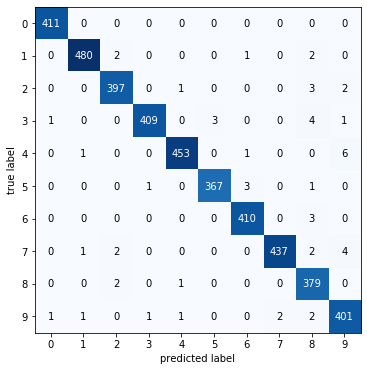

In [52]:
plot_confusion_matrix(conf_matrix_,figsize=(6,6),hide_ticks= True)
plt.xticks(range(10))
plt.yticks(range(10))

In [53]:
accuracy_score(y_true=y_true,y_pred = y_pred)

0.9866666666666667